In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



2024-06-14 23:27:06.767273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('HIGGS_100k.csv', header=None,names = ['class','lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude',
'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag',
'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm jj', 'm jjj', 'm lv',
'm jlv', 'm bb', 'm wbb', 'm wwbb'])

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
class,100001.0,0.528335,0.499199,0.000000,0.000000,1.000000,1.000000,1.000000
lepton pT,100001.0,0.990365,0.561838,0.274697,0.590936,0.854835,1.236776,7.805887
lepton eta,100001.0,-0.003812,1.004837,-2.434976,-0.741244,-0.002976,0.735292,2.433894
lepton phi,100001.0,-0.001634,1.006185,-1.742508,-0.868047,0.000971,0.868220,1.743236
missing energy magnitude,100001.0,0.995055,0.595359,0.001283,0.575644,0.890279,1.290878,7.998711
missing energy phi,100001.0,-0.007618,1.006994,-1.743944,-0.881453,-0.011042,0.865865,1.743229
jet 1 pt,100001.0,0.987109,0.473118,0.139976,0.676336,0.892163,1.167809,7.064657
jet 1 eta,100001.0,-0.003020,1.008701,-2.968735,-0.688235,-0.000025,0.683233,2.969674
jet 1 phi,100001.0,0.000430,1.008428,-1.741237,-0.867542,-0.003822,0.871085,1.741454
jet 1 b-tag,100001.0,0.998334,1.027402,0.000000,0.000000,1.086538,2.173076,2.173076


In [4]:
label = data['class'] # separa a coluna de sinal e ruido 
low_level = data.iloc[:, 1:22] # separa os low level featuares


In [5]:
# Porcentagem de sinal e ruido 
label.value_counts(normalize=True)*100 

class
1.0    52.833472
0.0    47.166528
Name: proportion, dtype: float64

In [6]:
# Normalização dos dados 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
low_level_scaled = scaler.fit_transform(low_level)

# Separação entre treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(low_level_scaled, label, random_state=42, test_size=0.25)

In [7]:
# printa os shape para saber oq tá acontecendo aaaa
print(low_level.shape)
print(X_train.shape)
print(X_test.shape)
print(label.shape)

(100001, 21)
(75000, 21)
(25001, 21)
(100001,)


In [8]:
#algumas funções de plot para facilitar 
def plot_epoch(model_num, test):
    val_test = 'val_' + test
    plt.plot(model_num.history[val_test], color='b', label=f"{test} validação")
    plt.plot(model_num.history[test], color='r', label=f"{test} treinamento")
    plt.title(f"Histórico de treinamento: {test}")
    plt.xlabel("Epochs")
    plt.ylabel(test)
    plt.legend()
    plt.show()

In [9]:
from keras.metrics import Precision, Recall, MeanSquaredError, F1Score

In [10]:
# contrução do modelo
model = Sequential([
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(1, activation='tanh')
])
optmizer = Adam(learning_rate=0.0001)
# model.compile(optimizer = optmizer, loss ='binary_crossentropy', metrics=['accuracy', 'precision', 'recall', 'mean_squared_error','f1_score'])
model.compile(optimizer = optmizer, loss ='binary_crossentropy',
               metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), MeanSquaredError(name='mean_squared_error'),
                        F1Score(name='f1_score')])

model2 = Sequential([
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(1, activation='tanh')
])
optmizer = Adam(learning_rate=0.0001)
model2.compile(optimizer = optmizer, loss ='mean_squared_error', 
               metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), MeanSquaredError(name='mean_squared_error'),
                        F1Score(name='f1_score')])

model3 = Sequential([
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(24, activation='tanh', input_shape=(21,)),
    Dense(24, activation='tanh', input_shape=(21,)),
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(1, activation='tanh')
])
optmizer = Adam(learning_rate=0.0001)
model3.compile(optimizer = optmizer, loss ='binary_crossentropy', 
               metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), MeanSquaredError(name='mean_squared_error'),
                        F1Score(name='f1_score')])

model4 = Sequential([
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(16, activation='tanh', input_shape=(21,)),
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(8, activation='tanh', input_shape=(21,)),
    Dense(1, activation='tanh')
])
optmizer = Adam(learning_rate=0.0001)
model4.compile(optimizer = optmizer, loss ='binary_crossentropy', 
               metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), MeanSquaredError(name='mean_squared_error'),
                        F1Score(name='f1_score')])


/Users/luanareis/opt/anaconda3/envs/env_AI/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
epoch = 200
batch_size = 100

treino = model.fit(X_train,y_train, epochs = epoch, validation_data = (X_test, y_test), batch_size = batch_size )

Epoch 1/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4965 - f1_score: 0.6908 - loss: 4.4050 - mean_squared_error: 0.7945 - precision: 0.5353 - recall: 0.3496 - val_accuracy: 0.5033 - val_f1_score: 0.6922 - val_loss: 3.7194 - val_mean_squared_error: 0.5967 - val_precision: 0.5404 - val_recall: 0.4125
Epoch 2/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.4956 - f1_score: 0.6945 - loss: 3.1419 - mean_squared_error: 0.5119 - precision: 0.5321 - recall: 0.4346 - val_accuracy: 0.5079 - val_f1_score: 0.6922 - val_loss: 1.1667 - val_mean_squared_error: 0.3156 - val_precision: 0.5329 - val_recall: 0.5703
Epoch 3/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.4995 - f1_score: 0.6875 - loss: 1.0258 - mean_squared_error: 0.3080 - precision: 0.5197 - recall: 0.5837 - val_accuracy: 0.5135 - val_f1_score: 0.6922 - val_loss: 0.7987 - val_mean_squared_error: 0.2830 - val_precision: 0.5329 - val_recall: 0.6548
Epoch 4/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/s

In [12]:
def f1(treino):
    prec = np.array(treino.history['precision'])
    rec = np.array(treino.history['recall'])
    return 2*((prec*rec)/(prec+rec))

def f1_val(treino):
    prec = np.array(treino.history['val_precision'])
    rec = np.array(treino.history['val_recall'])
    return 2*((prec*rec)/(prec+rec))

def plot_f1(model):
    plt.plot(f1(treino), color='b', label="F1 validação")
    plt.plot(f1_val(treino), color='r', label=f"F1 treinamento")
    plt.title(f"Histórico de treinamento: F1")
    plt.xlabel("Epochs")
    plt.ylabel('F1')
    plt.legend()
    plt.show()


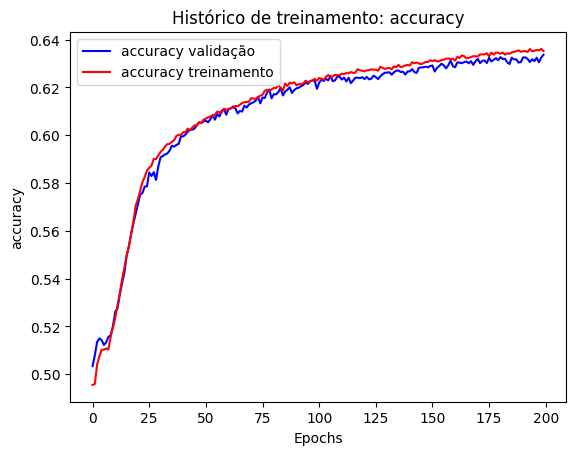

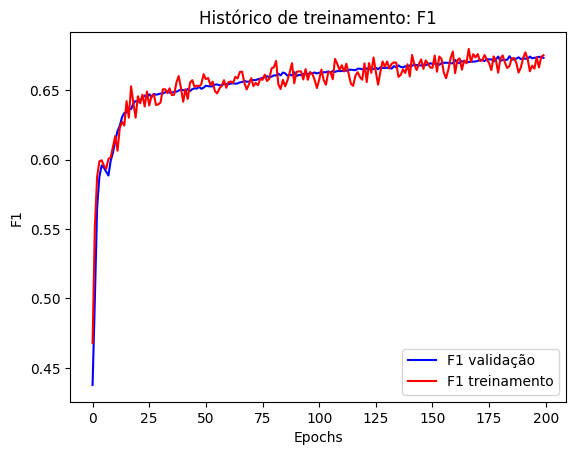

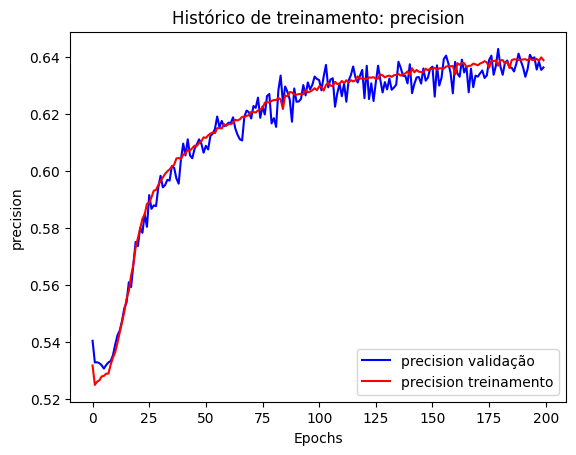

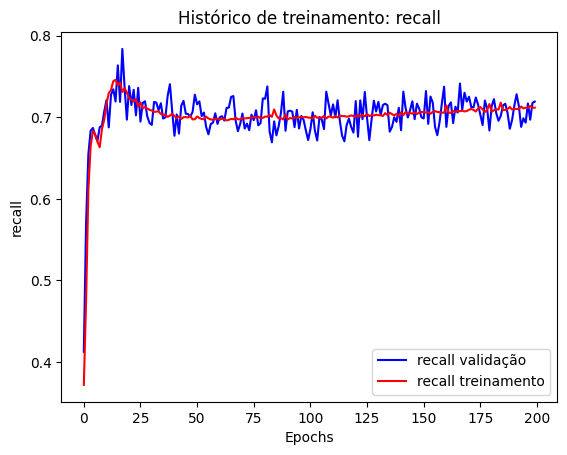

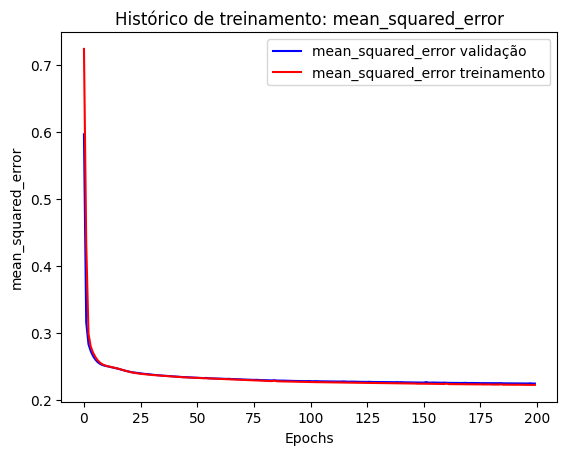

In [13]:
plot_epoch(treino, 'accuracy')
plot_f1(treino)
plot_epoch(treino, 'precision')
plot_epoch(treino, 'recall')
plot_epoch(treino, 'mean_squared_error')

In [14]:
epoch = 200
batch_size = 100

treino2 = model2.fit(X_train,y_train, epochs = epoch, validation_data = (X_test, y_test), batch_size = batch_size )

Epoch 1/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4976 - f1_score: 0.6882 - loss: 0.5729 - mean_squared_error: 0.5729 - precision: 0.5362 - recall: 0.3140 - val_accuracy: 0.5305 - val_f1_score: 0.6922 - val_loss: 0.2516 - val_mean_squared_error: 0.2516 - val_precision: 0.5515 - val_recall: 0.6053
Epoch 2/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.5294 - f1_score: 0.6901 - loss: 0.2505 - mean_squared_error: 0.2505 - precision: 0.5448 - recall: 0.6492 - val_accuracy: 0.5367 - val_f1_score: 0.6922 - val_loss: 0.2493 - val_mean_squared_error: 0.2493 - val_precision: 0.5490 - val_recall: 0.6990
Epoch 3/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.5369 - f1_score: 0.6932 - loss: 0.2490 - mean_squared_error: 0.2490 - precision: 0.5491 - recall: 0.7085 - val_accuracy: 0.5401 - val_f1_score: 0.6922 - val_loss: 0.2485 - val_mean_squared_error: 0.2485 - val_precision: 0.5511 - val_recall: 0.7069
Epoch 4/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/s

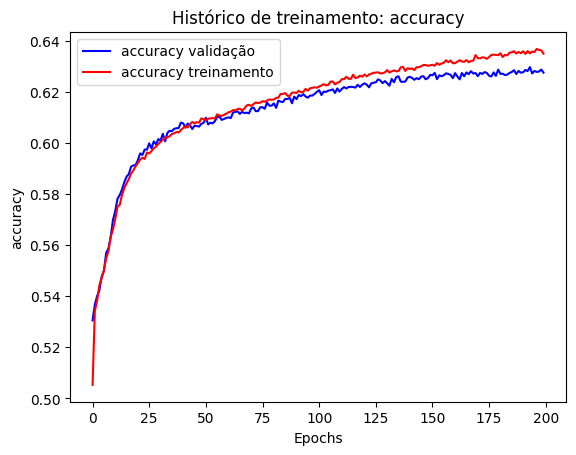

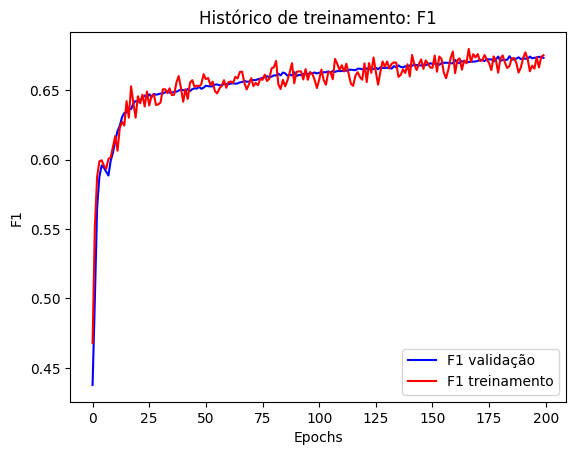

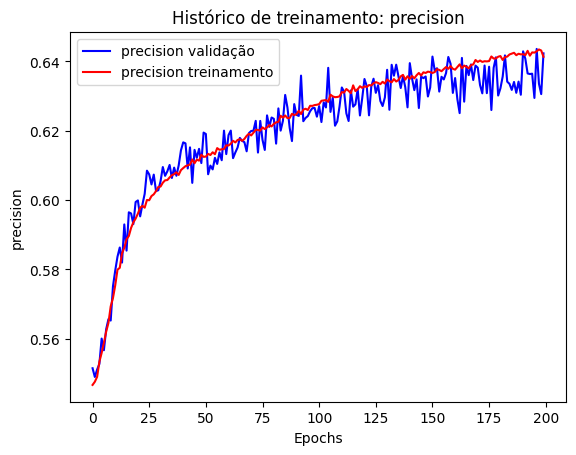

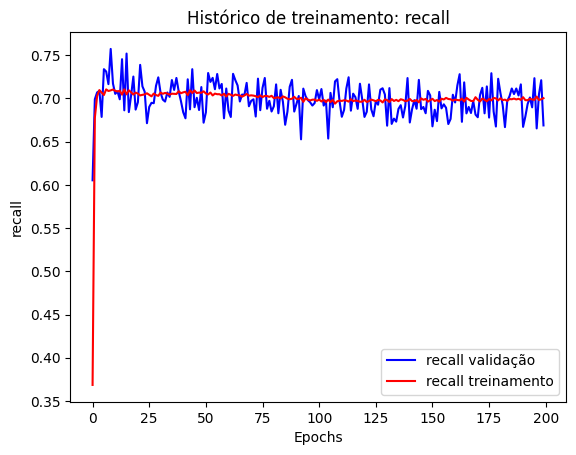

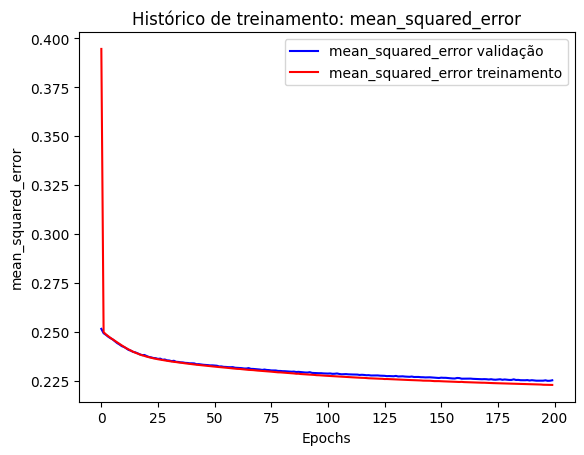

In [15]:
plot_epoch(treino2, 'accuracy')
plot_f1(treino2)
plot_epoch(treino2, 'precision')
plot_epoch(treino2, 'recall')
plot_epoch(treino2, 'mean_squared_error')

In [16]:
epoch = 200
batch_size = 100

treino3 = model3.fit(X_train,y_train, epochs = epoch, validation_data = (X_test, y_test), batch_size = batch_size )

Epoch 1/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5070 - f1_score: 0.6893 - loss: 4.0690 - mean_squared_error: 0.7313 - precision: 0.5518 - recall: 0.3341 - val_accuracy: 0.5142 - val_f1_score: 0.6922 - val_loss: 1.9369 - val_mean_squared_error: 0.3735 - val_precision: 0.5450 - val_recall: 0.4979
Epoch 2/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.5158 - f1_score: 0.6899 - loss: 1.1693 - mean_squared_error: 0.3057 - precision: 0.5363 - recall: 0.5943 - val_accuracy: 0.5242 - val_f1_score: 0.6922 - val_loss: 0.7252 - val_mean_squared_error: 0.2633 - val_precision: 0.5389 - val_recall: 0.7011
Epoch 3/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.5194 - f1_score: 0.6927 - loss: 0.7238 - mean_squared_error: 0.2621 - precision: 0.5355 - recall: 0.7017 - val_accuracy: 0.5223 - val_f1_score: 0.6922 - val_loss: 0.7105 - val_mean_squared_error: 0.2576 - val_precision: 0.5374 - val_recall: 0.7006
Epoch 4/200
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/s

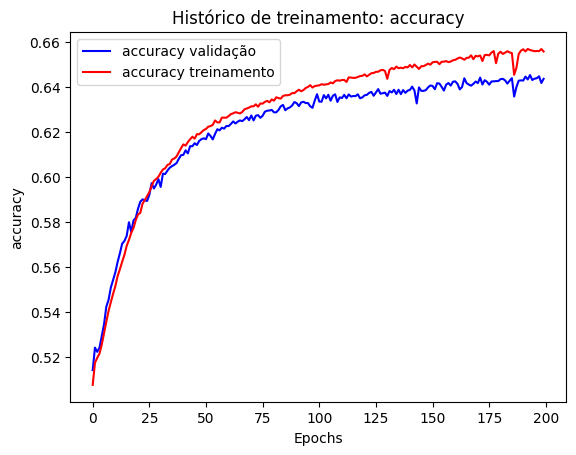

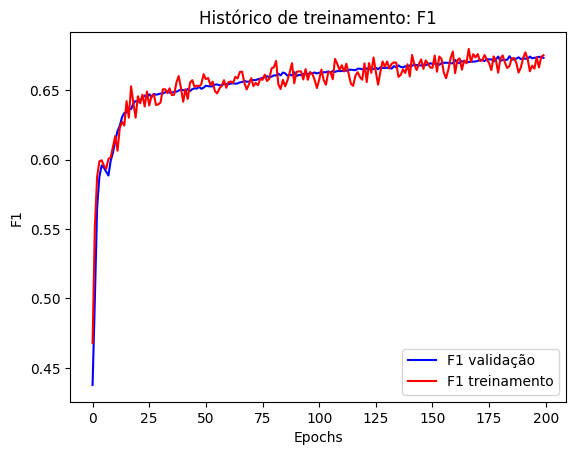

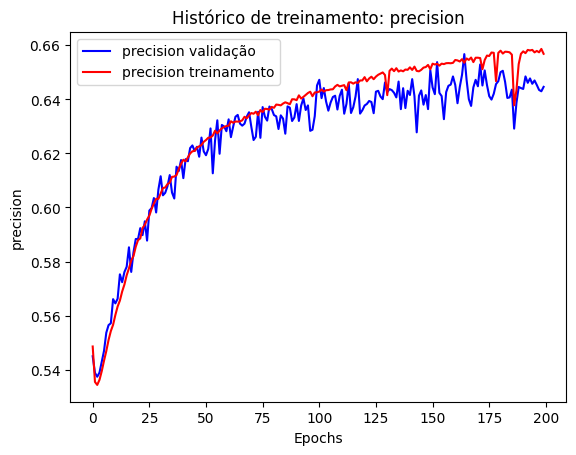

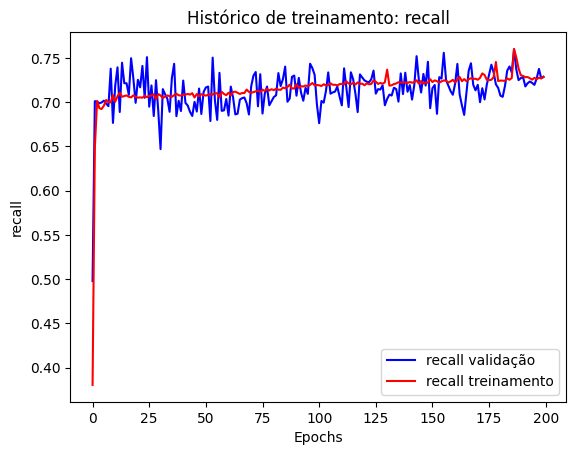

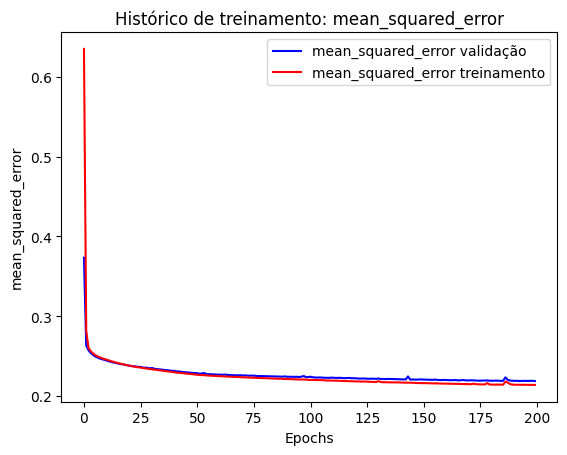

In [17]:
plot_epoch(treino3, 'accuracy')
plot_f1(treino3)
plot_epoch(treino3, 'precision')
plot_epoch(treino3, 'recall')
plot_epoch(treino3, 'mean_squared_error')

In [18]:
epoch = 150
batch_size = 100

treino4 = model4.fit(X_train,y_train, epochs = epoch, validation_data = (X_test, y_test), batch_size = batch_size )

Epoch 1/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4998 - f1_score: 0.6874 - loss: 3.0278 - mean_squared_error: 0.4754 - precision: 0.5528 - recall: 0.2346 - val_accuracy: 0.5072 - val_f1_score: 0.6922 - val_loss: 0.7501 - val_mean_squared_error: 0.2669 - val_precision: 0.5440 - val_recall: 0.4261
Epoch 2/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.5137 - f1_score: 0.6911 - loss: 0.7310 - mean_squared_error: 0.2632 - precision: 0.5457 - recall: 0.4726 - val_accuracy: 0.5180 - val_f1_score: 0.6922 - val_loss: 0.7080 - val_mean_squared_error: 0.2566 - val_precision: 0.5409 - val_recall: 0.5908
Epoch 3/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.5185 - f1_score: 0.6919 - loss: 0.7058 - mean_squared_error: 0.2557 - precision: 0.5400 - recall: 0.6065 - val_accuracy: 0.5257 - val_f1_score: 0.6922 - val_loss: 0.7022 - val_mean_squared_error: 0.2541 - val_precision: 0.5421 - val_recall: 0.6705
Epoch 4/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/s

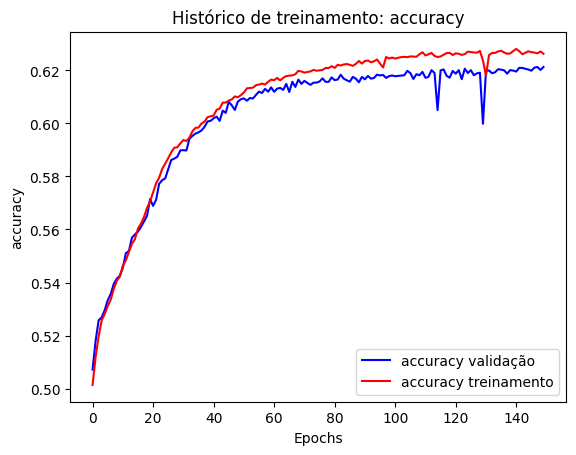

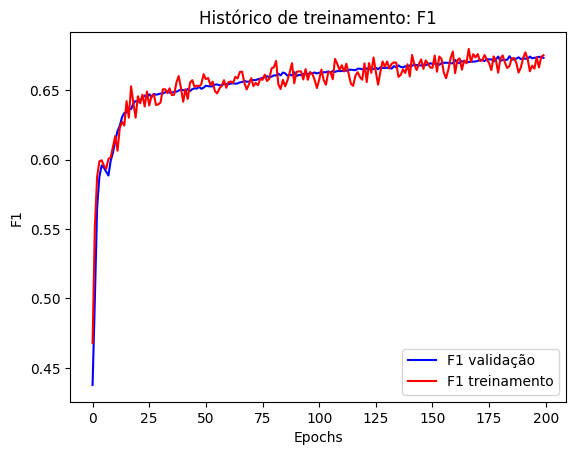

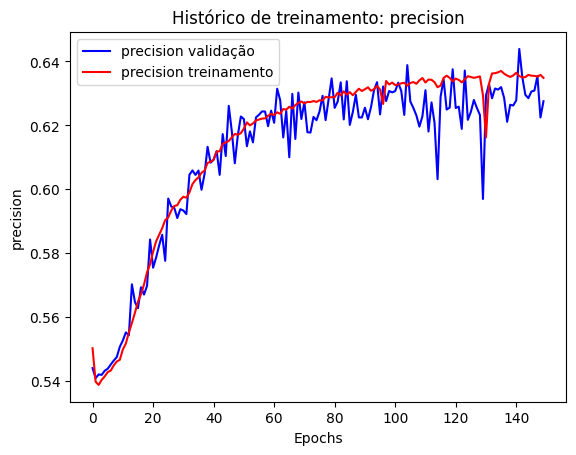

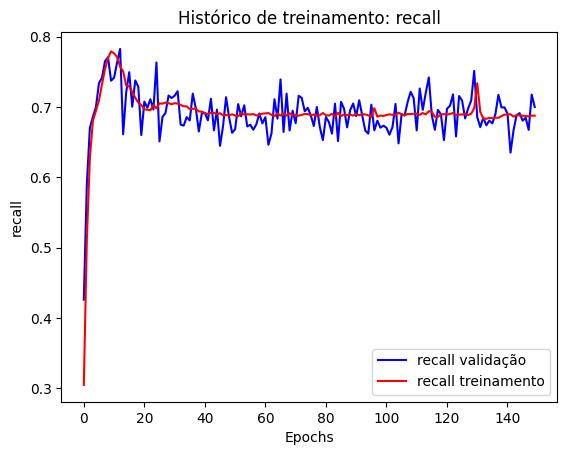

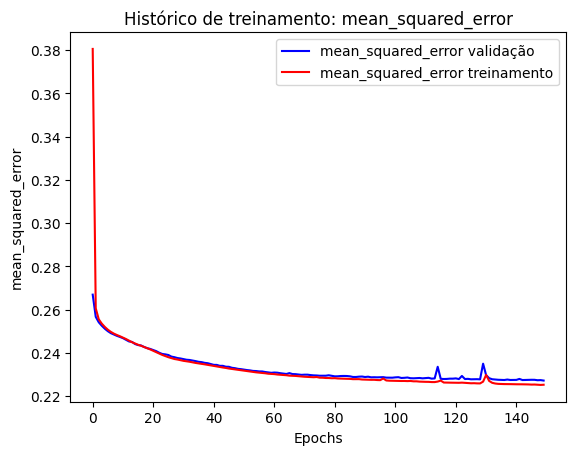

In [19]:
plot_epoch(treino4, 'accuracy')
plot_f1(treino4)
plot_epoch(treino4, 'precision')
plot_epoch(treino4, 'recall')
plot_epoch(treino4, 'mean_squared_error')

In [20]:
predictions = model4.predict(low_level_scaled)

# # Aplicando a função de limiar
# threshold = 0.9
# predictions = np.where(predictions > threshold, 1, 0)


3126/3126 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step


In [21]:
data['pred'] = predictions
data['pred'].value_counts(normalize=True) * 100

pred
0.629826    0.003
0.617086    0.003
0.513468    0.003
0.512993    0.003
0.764607    0.003
            ...  
0.650419    0.001
0.482652    0.001
0.352828    0.001
0.436528    0.001
0.432971    0.001
Name: proportion, Length: 99340, dtype: float64

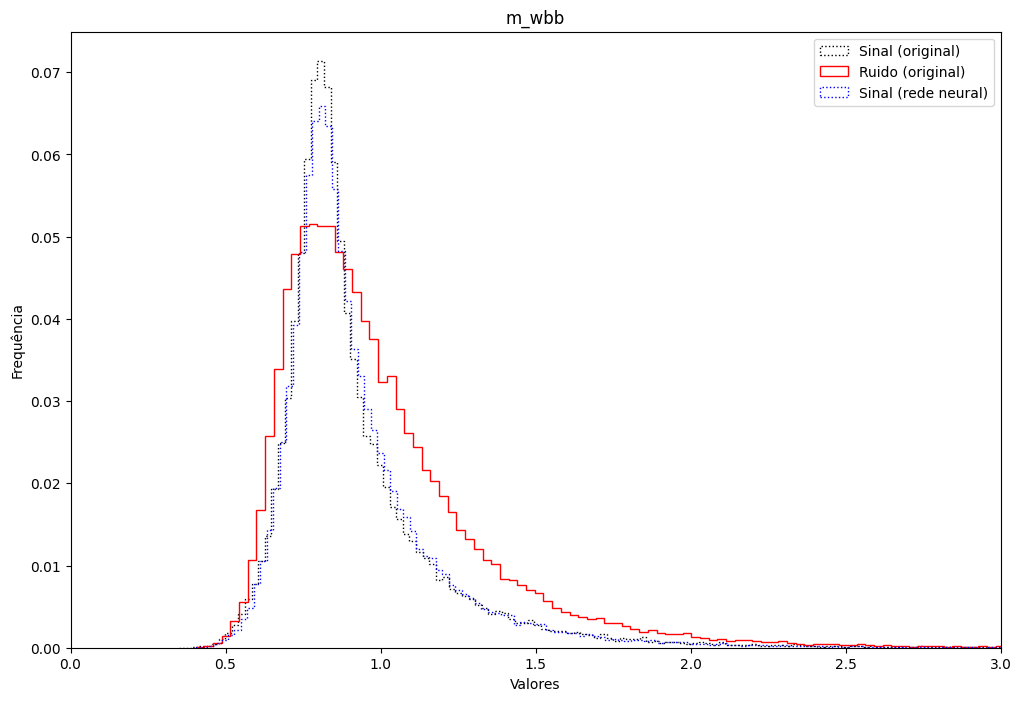

In [22]:
#Plota o histograma coms os dados originais 
dados_sinal = data[data['class']==1]
dados_ruido = data[data['class']==0]

sinal_pred = data[data['pred']>=0.5]
ruido_pred = data[data['pred']<0.5]



plt.figure(figsize=(12,8))
plt.hist(dados_sinal['m wwbb'], bins=200, histtype='step', edgecolor='black', linestyle='dotted', label="Sinal (original)", weights=np.ones(len(dados_sinal['m wwbb'])) / len(dados_sinal['m wwbb']))
plt.hist(dados_ruido['m wwbb'], bins=200, histtype='step', edgecolor='red', label="Ruido (original)", weights=np.ones(len(dados_ruido['m wwbb'])) / len(dados_ruido['m wwbb']))
plt.hist(sinal_pred['m wwbb'], bins=200, histtype='step', edgecolor='blue', linestyle='dotted', label="Sinal (rede neural)", weights=np.ones(len(sinal_pred['m wwbb'])) / len(sinal_pred['m wwbb']))
# plt.hist(ruido_pred['m wwbb'], bins=200, histtype='step', edgecolor='orange', label="Ruido (rede neural)", weights=np.ones(len(ruido_pred['m wwbb'])) / len(ruido_pred['m wwbb']))
plt.legend()
plt.xlim(0,3)
plt.title('m_wbb')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

